In [2]:
# Importanto as bibliotecas básicas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
# Importando módulos para machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Importanto módulos para Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, MaxPooling2D
import keras
# Importando módulos de métricas
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
# Class names : identificando os números
class_names = [str(i) for i in np.arange(0,10,1)]
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
# Normalizando
X_train = X_train/255
X_test = X_test/255

In [12]:
# Olhar o shape
print("Treino", X_train.shape, y_train.shape)
print("Teste", X_test.shape, y_test.shape)

Treino (60000, 28, 28) (60000,)
Teste (10000, 28, 28) (10000,)


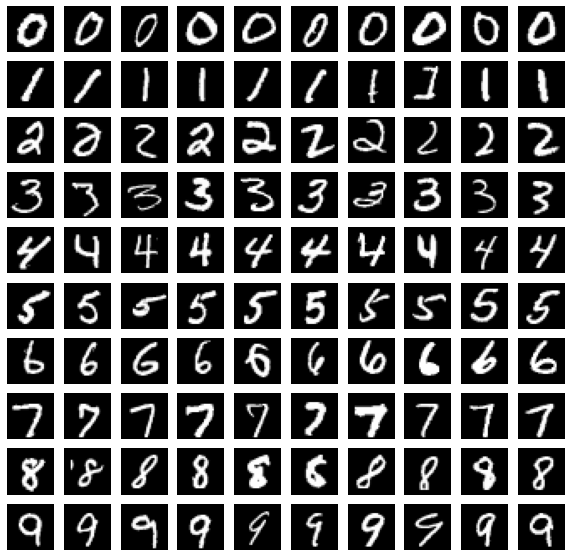

In [17]:
f, ax = plt.subplots(10, 10, figsize = (10,10))
for i, class_name in enumerate(class_names):
    
    index = np.argwhere(y_train == i)
    index = random.choices(index, k = 10)
    for n in range(0,10):
        idx = index[n][0]
        features = X_train[idx]
        target = y_train[idx]
        img = features.reshape(28,28)
        ax[i][n].imshow(img, cmap = 'gray')
        ax[i,n].axis('off')
plt.axis('off')
plt.show()

In [18]:
X_train_rd = X_train.reshape(60_000, -1)
X_test_rd = X_test.reshape(10_000, -1)

print(X_train_rd.shape)
print(X_test_rd.shape)

(60000, 784)
(10000, 784)


In [19]:
number_rf = RandomForestClassifier()
number_rf.fit(X_train_rd, y_train)
y_pred_rf = number_rf.predict(X_test_rd)

In [20]:
# Classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.94      0.96       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.93      0.96      0.95       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


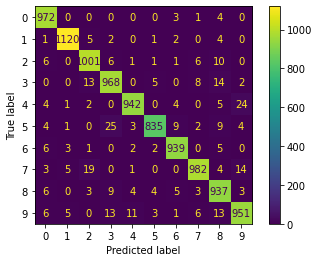

In [21]:
# plotar confusion matrix para o dataset de teste
plot_confusion_matrix(number_rf, X_test_rd, y_test)
plt.show()

In [22]:
# Função para plotar a imagem
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    # np.argmax : 
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Cria o gráfico com as probabilidades

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

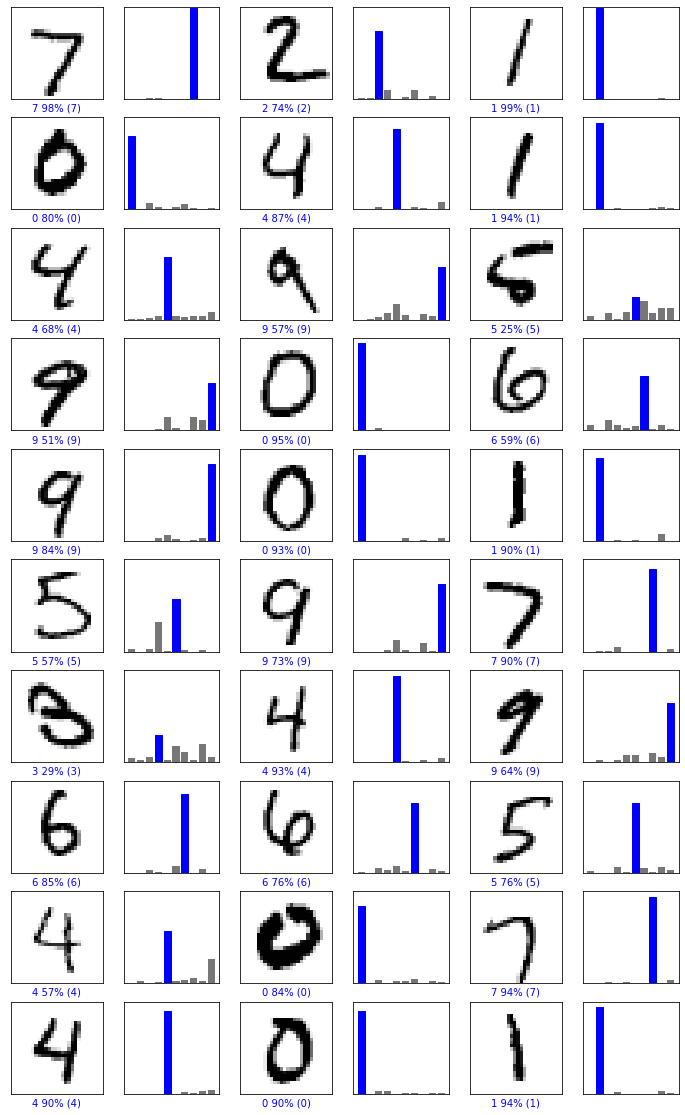

In [24]:
# ver a probabilidade
y_prob_rf = number_rf.predict_proba(X_test_rd)
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_prob_rf, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_prob_rf, y_test)
plt.show()

### Redes Neurais

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
# CNN - Redes Neurais Convolucionais
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print(X_train_cnn.shape)

(60000, 28, 28, 1)


In [27]:
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print(X_test_cnn.shape)

(10000, 28, 28, 1)


##### Construir a rede neural. Diferente dos modelos de ML do sklearn, precisamos detalhar a arquitetura que será utilizada

In [38]:
# Definindo o modelo CNN

# Uma camada de Convolução : 
# Uma camada de MaxPooling :
# Uma camada Densa : 
# Uma camada de saída (10 neurônios -> 10 classes) : 
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), name='Conv2D'),
    MaxPool2D((2,2), name='Max_Pool'),
    Flatten(name='Flatten'),
    Dense(100, activation='relu', name='Dense_inter'),
    Dense(10, activation='softmax', name='Output_layer'),
])
# Compilando o modelo
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Crie o summary() para o modelo
cnn.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [35]:
# Fit dos dados de treino
cnn.fit(X_train_cnn, y_train, epochs=5) # maior epoch, maior a acurácia, X_train_cnn (60_000 amostras, com 28 de largura e 28 de altura, 1 canal), volta a ser a imagem (precisa ser esse formato do input shape)
# Predição dos dados de teste
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis = -1) # qual o valor de x(índice) que maximiza o valor do predict. Ou seja, a classe que tem o maior valor de predict
y_pred_cnn

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.8012 - accuracy: 0.7626
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3355 - accuracy: 0.9016
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2922 - accuracy: 0.9138
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2591 - accuracy: 0.9235
Epoch 5/5
313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.92      0.93      1032
           3       0.88      0.93      0.90      1010
           4       0.94      0.91      0.92       982
           5       1.00      0.73      0.84       892
           6       0.95      0.96      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.83      0.95      0.89       974
           9       0.89      0.93      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



313/313 [==============================] - 1s 3ms/step


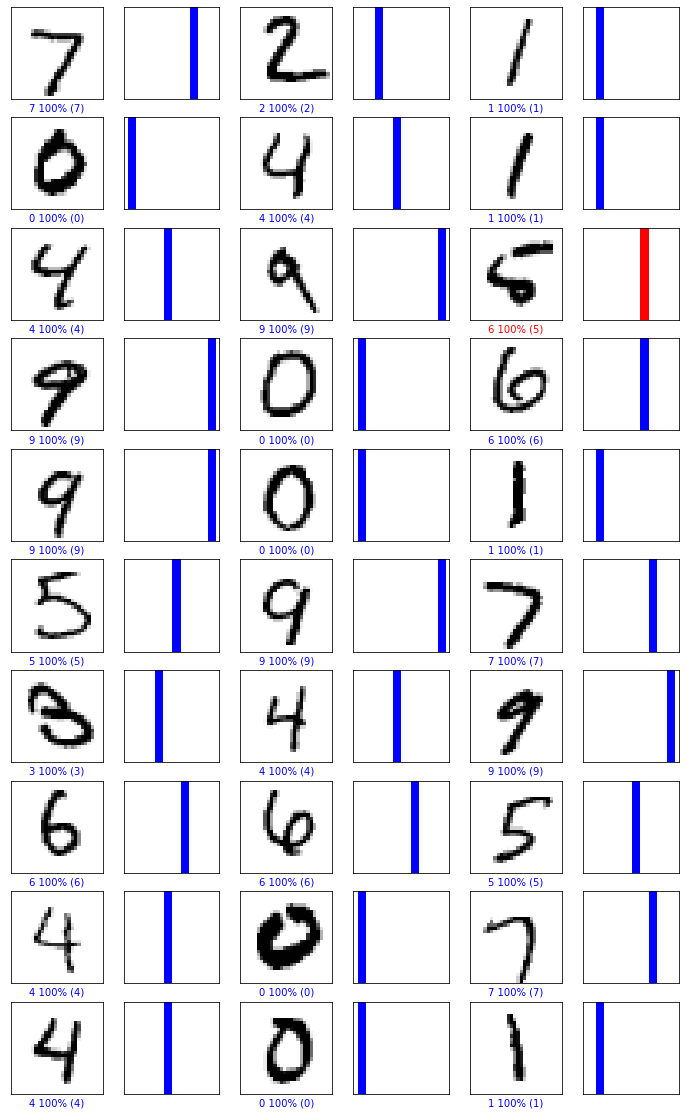

In [37]:
# Trazendo a probabilidade de cada classe
y_prob_cnn = cnn.predict(X_test_cnn)
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.

num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_prob_cnn, y_test, X_test_cnn.reshape(X_test_cnn.shape[0], X_test_cnn.shape[1], X_test_cnn.shape[2]))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_prob_cnn, y_test)
plt.show()